<a href="https://colab.research.google.com/github/deepasrivaradharajan/RBI-DSIM-Analytical-Portfolio-./blob/main/Bank_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Simulation Complete. Total Default Rate: 15.16%

MODEL PERFORMANCE: Logistic Regression for Default Prediction
                precision    recall  f1-score   support

No Default (0)       0.85      1.00      0.92      1271
   Default (1)       0.00      0.00      0.00       229

      accuracy                           0.85      1500
     macro avg       0.42      0.50      0.46      1500
  weighted avg       0.72      0.85      0.78      1500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


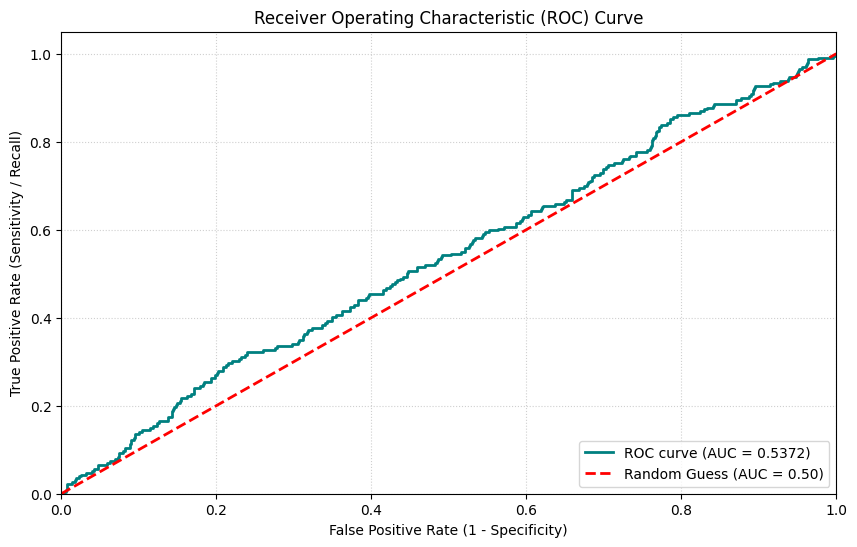

--------------------------------------------------
Project Completed: Loan Default Risk Prediction
Key Result: Model AUC (Area Under Curve): 0.5372
This metric shows the model's ability to distinguish between defaulters and non-defaulters.
--------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc

# --- 1. DATA SIMULATION (Mimicking Loan Application Data) ---
# Goal: Create a synthetic dataset for 5000 loan applications
np.random.seed(42)
N = 5000 # Number of applicants

# Key Features (Independent Variables)
data = {
    # Higher score = Lower Default Risk
    'Credit_Score': np.random.normal(loc=650, scale=80, size=N).clip(300, 850).astype(int),
    # Higher income = Lower Default Risk
    'Annual_Income_k': np.random.normal(loc=80, scale=30, size=N).clip(20, 300).astype(int),
    # Higher loan amount relative to income = Higher Default Risk
    'Loan_to_Income_Ratio': np.random.uniform(0.1, 1.5, size=N),
    # Binary: 1 if applicant has existing mortgage, 0 otherwise
    'Has_Mortgage': np.random.randint(0, 2, size=N)
}
df = pd.DataFrame(data)

# --- Create the Target Variable ('Default') ---
# Create a default probability based on features:
# Low Credit Score (+), High LTV (+), Low Income (+) -> Higher Default Probability
base_prob = 0.1 # Baseline 10% default rate
prob_default = (
    base_prob
    + (750 - df['Credit_Score']) / 5000  # Credit Score impact
    + (df['Loan_to_Income_Ratio'] * 0.05) # LTI impact
    - (df['Annual_Income_k'] / 5000) # Income impact
).clip(0.01, 0.45) # Keep probabilities between 1% and 45%

# Generate the 'Default' target variable (1 = Default, 0 = No Default)
df['Default'] = np.random.binomial(1, prob_default, size=N)

# Separate features (X) and target (y)
X = df[['Credit_Score', 'Annual_Income_k', 'Loan_to_Income_Ratio', 'Has_Mortgage']]
y = df['Default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Data Simulation Complete. Total Default Rate: {y.mean()*100:.2f}%")


# --- 2. ANALYSIS & MODELING: Logistic Regression Classifier ---
# The logistic regression model predicts the probability of default
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predict probabilities and classes on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# --- Calculate Key Model Performance Metrics ---
print("\n" + "=" * 50)
print("MODEL PERFORMANCE: Logistic Regression for Default Prediction")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=['No Default (0)', 'Default (1)']))

# Calculate AUC (Area Under the Curve) - A key metric for risk models
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


# --- 3. VISUALIZATION: Plotting the ROC Curve (Key Model Diagnostic) ---
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle=':', alpha=0.6)
plt.savefig('Model_Performance_ROC.png')
plt.show()

# --- 4. Print the key quantifiable result ---
print("-" * 50)
print(f"Project Completed: Loan Default Risk Prediction")
print(f"Key Result: Model AUC (Area Under Curve): {roc_auc:.4f}")
print(f"This metric shows the model's ability to distinguish between defaulters and non-defaulters.")
print("-" * 50)